In [13]:
import json, os, re, math, random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

class UnlabeledResultFixed: # Active learning
    def __init__(self, fixedEntropyCsv, fixedSeriesCsv, outputFolder, classL):
        self.df_entropy  = pd.read_csv(fixedEntropyCsv)
        self.df_series   = pd.read_csv(fixedSeriesCsv)
        self.outputFolder= outputFolder
        self.classL      = classL
        df = pd.concat([self.df_entropy[['imgPath','gt']], self.df_series[['imgPath','gt']]], axis=0, ignore_index=True)
        df = df[ df['gt']!="-" ]
        df.to_csv(f"{self.outputFolder}/active_complete.csv", sep=" ", header=False, index=False)
        
    def plotConfusion(self):
        n = len(self.classL)
        M = np.zeros((n,n))
        for i in range(len(self.df_series)):
            gt, pd = self.df_series.loc[i]['gt'], self.df_series.loc[i]['pd_cls']
            if gt!='-':
                M[int(gt)][int(pd)]+=1
        #print(M)
        
        R, P = M.copy(), M.copy()
        for i in range(n):
            rowSum = sum(M[i,:])
            colSum = sum(M[:,i])
            for j in range(n):
                R[i][j] = round(R[i][j]/rowSum,3) if rowSum else 0
                P[j][i] = round(P[j][i]/colSum,3) if colSum else 0
        
        plt.figure(figsize=(18,4))
        #
        plt.subplot(1,3,1)
        plt.title("Number", fontsize=14)
        plt.xlabel("PD")
        plt.ylabel("GT")
        plt.xticks(range(n),self.classL, fontsize=14)
        plt.yticks(range(n),self.classL, fontsize=14)
        plt.imshow(R, cmap=mpl.cm.Blues)
        plt.colorbar()
        for i in range(n):
            for j in range(n):
                plt.annotate(int(M[i][j]), xy=(j,i), ha="center", va="center", color="black" if R[i][j]<0.5 else "white", fontsize=14)
        #
        plt.subplot(1,3,2)
        plt.title("row normalized (recall)", fontsize=14)
        plt.xlabel("PD")
        plt.ylabel("GT")
        plt.xticks(range(n),self.classL, fontsize=14)
        plt.yticks(range(n),self.classL, fontsize=14)
        plt.imshow(R, cmap=mpl.cm.Blues)
        plt.colorbar()
        for i in range(n):
            for j in range(n):
                plt.annotate(R[i][j], xy=(j,i), ha="center", va="center", color="black" if R[i][j]<0.5 else "white", fontsize=14)
        #
        plt.subplot(1,3,3)
        plt.title("col normalized (precision)", fontsize=14)
        plt.xlabel("PD")
        plt.ylabel("GT")
        plt.xticks(range(n),self.classL, fontsize=14)
        plt.yticks(range(n),self.classL, fontsize=14)
        plt.imshow(P, cmap=mpl.cm.Blues)
        plt.colorbar()
        for i in range(n):
            for j in range(n):
                plt.annotate(P[i][j], xy=(j,i), ha="center", va="center", color="black" if P[i][j]<0.5 else "white", fontsize=14)
        plt.savefig(f"{self.outputFolder}/confusion.jpg")
        plt.show()
        print( np.diagonal(R).mean(), np.diagonal(P).mean() )

[[ 0.  0.  0.  0.]
 [ 0. 10.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 3. 11.  6.  0.]]


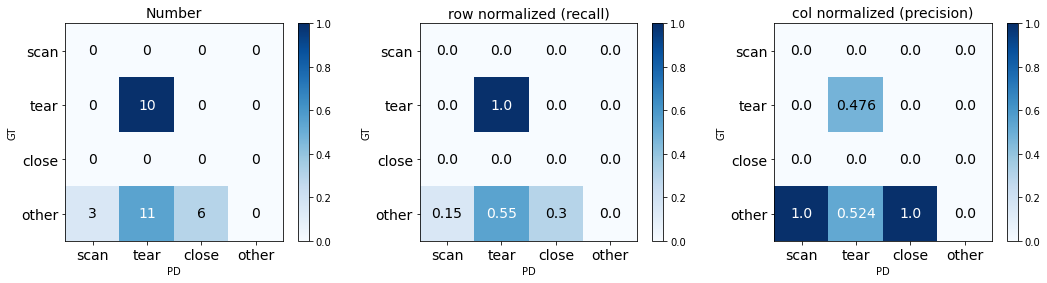

0.25 0.119


In [38]:
obj = UnlabeledResultFixed(fixedEntropyCsv="../_exps/unlabeled_0826_all/active_entropy_fixed.csv", fixedSeriesCsv="../_exps/unlabeled_0826_all/active_series_fixed.csv", \
                           outputFolder="../_exps/unlabeled_0826_all", classL=['scan','tear','close','other'])
obj.plotConfusion()

[[ 8.  2.  0.  0.]
 [ 0. 23.  1.  0.]
 [ 0.  0.  4.  0.]
 [ 3. 12. 44.  0.]]


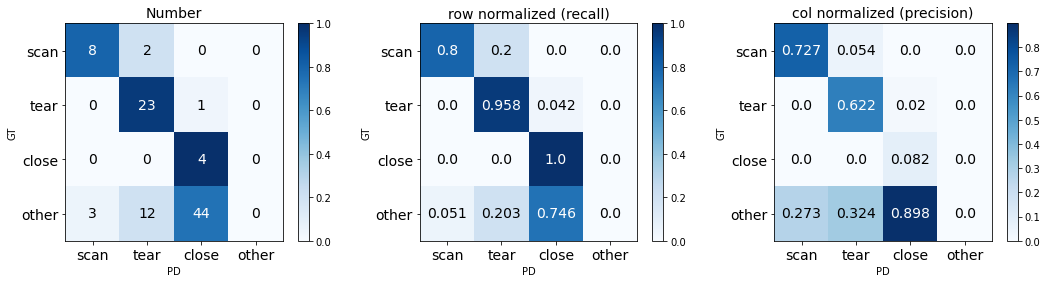

0.6895 0.35775


In [14]:
obj = UnlabeledResultFixed(fixedEntropyCsv="../_exps/unlabeled_0826_all_from_v3/active_entropy_fixed.csv", \
                           fixedSeriesCsv ="../_exps/unlabeled_0826_all_from_v3/active_series_fixed.csv", \
                           outputFolder   ="../_exps/unlabeled_0826_all_from_v3", classL=['scan','tear','close','other'])
obj.plotConfusion()